In [ ]:
# 기본
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA, TruncatedSVD 
import matplotlib.patches as mpatches 
import time 

# 분류 라이브러리
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
import collections 

# 기타 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline 
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline 
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss 
from imblearn.metrics import classification_report_imbalanced 
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report 
from collections import Counter 
from sklearn.model_selection import KFold, StratifiedKFold 
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

# [0402_vif,모델탐색] 데이터셋
df=pd.read_pickle('drive/MyDrive/프로젝트 2/dataset/sample.pkl')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2146508 entries, 0 to 2148124
Data columns (total 35 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   TRD_NAME_2                      int64  
 1   CUS_TOTAL_NUMBER_OF_PACKAGES_6  float64
 2   CON_TIN_8                       int64  
 3   CON_NAME_8                      int64  
 4   IMP_TRADING_COUNTRY_11          int64  
 5   VAL_FINANCIAL_VALUE_12          float64
 6   IMP_CNT_OF_DISPATCH_EXP_CD_15   int64  
 7   IMP_COUNTRY_OF_ORIGIN_16        int64  
 8   DEL_DELIVERY_TERM_CODE_20       int64  
 9   TOT_FINANCIAL_VALUE_22          float64
 10  OFF_CODE_30                     int64  
 11  GDS_GOODS_DESCRIPTION_31        int64  
 12  COM_COMBINED_NOMENCLATURE_33    int64  
 13  IDG_COUNTRY_OF_ORIGIN_34        int64  
 14  PRF_PREFERENCE_CODE_1           int64  
 15  PRF_PREFERENCE_CODE_2           int64  
 16  PRF_PREFERENCE_CODE_3           int64  
 17  PRF_PREFERENCE_CODE_4      

# 샘플링 분류

1. Oversampling : 적은 레이블을 가진 데이터 세트를 많은 레이블을 가진 데이터 세트의 크기와 같은 수준으로 샘플링(copy)하는 기법.
외부 데이터에 굉장히 민감하게 반응할 수 있다는 단점이 있다.즉, 과적합 가능성이 굉장히 커진다. 더불어 노이즈 또는 이상치에 민감하다.
copy 방법에 따라 종류가 구분되어 진다.

2. Undersampling: 많은 레이블을 가진 데이터 세트를 적은 레이블을 가진 데이터 세트 크기와 같은 수준으로 샘플링 하는 기법.
레이블 수가 줄어들어 계산 시간이 빨라진다.
정보 누락이 굉장히 크다는 단점이 있다.
sampling 하는 방법에 따라 종류가 구분되어 진다.

3. Over-sampling followed by under-sampling
두 기법을 combination 하는 것

## 샘플링 코드와 간단 개념
- 머신러닝 책 오버샘플링 예시


smote = SMOTE(random_state=0)


X_train_over, y_train_over = smote.fit_sample(X_train, y_train)


- 아래는 기본 코드라 세부적인 api는 검색이 필요하다.
그냥 ()로 사용해도 되는 것도 있고 sampling_stratege 설정이 필요한 것도 있다. 
(sampling_stratege ='majority/minority/{0:30} 등등') 

-----------------------------------------------------------------------------------

from imbearn.over_sampling import *
 
[오버샘플링(Over-sampling)]
1.  **RandomOverSampler**: 무작위로 분포가 작은 클래스의 데이터를 생성하는 것. 즉, 소수의 클래스 데이터를 반복해서 넣는것으로 가중치를 증가시키는 것과 비슷하다.

X_train_rand, y_train_rand = RandomOverSampler(random_state=0).fit_sample(X_train, y_train)
  

2. **ADASYN**: Adaptive synthetic sampling approach for Imbalanced learning, 분포가 작은 클래스 데이터와 그 데이터와 가까운 무작위 k개의 데이터 사이에 가상의 직선을 그려서 직선상에 존재하는 가상의 분포가 작은 클래스 데이터를 생성하는 것

X_train_ada, y_train_ada = ADASYN(random_state=0).fit_sample(X_train, y_train)


3. **SMOTE**: minority class에 있는 elements들의 사이를 k-nearest neighborhood의 방법으로 보강하는 기법입니다. minority class에 있는 elements사이를 채우는 기법

X_train_smote, y_train_smote = SMOTE(random_state=0).fit_sample(X_train, y_train)

-----------------------------------------------------------------------------------
[언더샘플링(Under-Sampling]
from imbearn.under_sampling import *
1. **RandomUnderSampler** : 무작위 샘플링( 이 샘플링의 장점이라면 어떤 조건 없이 데이터 분포를 맞추는 것이라 걸리는 시간이 굉장히 빠름 )

X_train_randu, y_train_randu = RandomUnderSampler(random_state=0).fit_sample(X_train, y_train)

2. **TomekLinks** : Tomek links는, 매우 가까운 instances들의 쌍을 나타낸다. 두 개의 class사이에 공간을 확보하기 위해 인접해있는 majority class를 지우는 방법

X_train_tome, y_train_tome = Tomekinks(random_state=0).fit_sample(X_train, y_train)

3. **CondensedNearestNeighbour** : 최근접인 클래스 분포 데이터를 삭제하면서 샘플링 하는 방법론

X_train_cnn, y_train_cnn = CondensedNearestNeighbour(random_state=0).fit_sample(X_train, y_train)

4. **OneSidedSelectiion** : 

X_train_oss, y_train_oss = OneSidedSelectiion(random_state=0).fit_sample(X_train, y_train)

5. **EditedNearestNeighbours** : 다수 클래스 데이터 중 가장 가까운 k(n_neighbors)개의 데이터가 모두 (kind_sel='all')또는 다수(kind_sel='mode') 클래스가 아니면 삭제하는 방법. 소수 클래스 주변이 다수 클레스 데이터는 사라진다.

X_train_enn, y_train_enn = EditedNearestNeighbours(random_state=0).fit_sample(X_train, y_train)

6. **NeighbourhoodCleaningRule**: CNN과 ENN 방법을 섰은 것. 분포가 큰 데이터에 대한 효과는 크지 않지만 좀 더 직관적으로 두 클래스를 나눌 수 있다.

X_train_ncr, y_train_ncr = NeighbourhoodCleaningRule(random_state=0).fit_sample(X_train, y_train)

7. **Cluster Centroids**:Cluster method를 바탕으로 한 Under-sampling 기법입니다. sampling_strategy의 딕셔너리값에 따라 전체 데이터셋에서 몇 개의 중심을 만들어내는지를 정하여 데이터를 sampling합니다. 가령 {0:30}이라면 전체 majority class의 instance에서 30개의 중심값을 sampling하는 것


X_train_cc, y_train_cc = ClusterCentroids(sampling_stratege={0:30}).fit_sample(X_train, y_train)


-----------------------------------------------------------------------------------
[복합샘플링(Combining Over and Under-sampling)]

from imbearn.combine import *

1. **SMOTE+ENN**:

X_train_se, y_train_se = SMOTEENN(random_state=0).fit_sample(X_train, y_train)

2. **SMOTE+Tomek**: SMOTE 기법으로 oversampling을 한 후, Tomek links 기법을 사용하여 class = 0 과 class = 1이 인접해있는 majority class를 지우는 방법

X_train_st, y_train_st = SMOTETomek(random_state=0).fit_sample(X_train, y_train)

참고(https://shinminyong.tistory.com/34)


## 언더 샘플링으로 히트맵을 시각화

In [ ]:
# 라벨 인코딩 된 것의 히트맵을 그려보자
df=pd.read_pickle('/content/drive/MyDrive/NA1/source_code/dataset/pkl/label_encoded_dataset_0402_0.1.pkl')
df.head()

TRD_NAME_2  TRD_ADDR_2  ...  ACCEPTANCE_DATE  LABEL
0       43123       23498  ...            87118      0
1       43123       23498  ...            87118      0
2       43123       23498  ...            87118      0
3          54        2079  ...            87205      0
4          54        2079  ...            87205      0

[5 rows x 48 columns]

In [ ]:
print('LABEL==0', round(df['LABEL'].value_counts()[0]/len(df)*100,2),'% of the dataset') 
print('LABEL==1', round(df['LABEL'].value_counts()[1]/len(df)*100,2),'% of the dataset')

LABEL==0 99.35 % of the dataset
LABEL==1 0.65 % of the dataset


### Splitting the Data (데이터 분할)

오버샘플링이든 언더 샘플링이든 하기 전에 
교차 검증을 진행해야 한다.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

X=df.drop('LABEL', axis=1)
y=df['LABEL']
sss = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False) # 층화 5-fold 분할
# 데이터를 5개로 분할하여 한번 테스트로 선택된 subset데이터는 다시 선택되지 않는다.
# 불균형한 분포도를 가진 데이터는 특히, 필수적으로 StratifiedKFold를 사용해야 한다.
# 그 이유는 단순한 Kfold로 진행할시 LABEL==1인 데이터와 LABEL==0인 데이터가 분할된 데이터세트로 불균형한 비율로 들어가기 때문이다. 
# 그러므로 분할된 데이터의 결과가 매우 극단적일 수 있다.(평균 결과로 산출하더라도.. 부정적 영향을 끼침)
# StratifiedKFold로 분할할 시, 분할된 5개 데이터 세트의 1과 0의 비율을 일정하게 만들 수 있다. 

for train_index, test_index in sss.split(X, y): # 학습-테스트 인덱스 추출
  print("Train:", train_index, "Test:", test_index) 
  original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index] 
  original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

#라벨마다 분포 확인하기 
original_Xtrain = original_Xtrain.values 
original_Xtest = original_Xtest.values 
original_ytrain = original_ytrain.values 
original_ytest = original_ytest.values 

#trian, test 라벨 분포 
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts = True) # 인덱스 번호를 보고 5-fold분할이 잘 되었는지 확인함
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts = True) 
print('-' * 100) 

print('Label Distributions: \n') 
print(train_counts_label/ len(original_ytrain)) # 0,1 비율
print(test_counts_label/ len(original_ytest))
print('-' * 100) 

# LABEL==1, LABEL==0 갯수
print(f'LABEL==1인 갯수 {len(df[df.LABEL==1])}/ LABLE==0인 갯수 {len(df[df.LABEL==0])}')


Train: [ 427858  427859  427860 ... 2146505 2146506 2146507] Test: [     0      1      2 ... 896394 896395 896396]
Train: [      0       1       2 ... 2146505 2146506 2146507] Test: [ 427858  427859  427860 ... 1113666 1113667 1113668]
Train: [      0       1       2 ... 2146505 2146506 2146507] Test: [ 855378  855379  855380 ... 1337940 1337941 1337942]
Train: [      0       1       2 ... 2146505 2146506 2146507] Test: [1287298 1287299 1287300 ... 1719905 1719906 1719907]
Train: [      0       1       2 ... 1719905 1719906 1719907] Test: [1431959 1431960 1431961 ... 2146505 2146506 2146507]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.993497 0.006503]
[0.9934964 0.0065036]
----------------------------------------------------------------------------------------------------
LABEL==1인 갯수 13959/ LABLE==0인 갯수 2132549


### Random Under-Sampling

1) 많은 클래스를 적은 클래스에 맞추어 50대 50 비율로 맞춘다.

2) 각 클래스 별로 비율이 같아졌다면, 데이터를 섞어준다.

언더샘플링의 치명적인 단점은 적은 클래스에 맞추기 때문에 발생하는 정보의 손실이다.

언더샘플링을 사용하게 된다면, LABEL = 1(위법물 적발)인 데이터 13961개에 맞추어 LABEL = 1(위법물 적발이 아닌 사례)인 데이터 13961개를 랜덤하게 택하게 된다. 선택된 데이터 외의 나머지는 삭제해야하고 그 순간 무려 2,118,680개의 거래 데이터를 사용할 수 없게 된다.

언더샘플링을 사용할 때에는 이 점을 항상 주의해야 한다.


-----------------------------------------------------------------------------------
**[진행 후 결론]**

불균형한 데이터셋은 일반 분류모델보다 상관관계를 도출할 때, 모델 평가의 혼돈 행렬에서도 일반 모델과 다른 모습을 보인다. 

언더샘플링의 문제는 서브샘플링한 LABEL==0에 대한 신뢰도의 보장이 되어 있지 않다는 것 뿐만 아니라, 모델에 적용할 시 대부분 성능이 좋지 않다는 점이다.


고로, 모델 적용을 위해서가 아닌 변수간 상관 관계를 보기위한 용도로
사용하면 좋을 것 같다. 


In [ ]:
#3-1. 랜덤 언더샘플링 
df = df.sample(frac = 1) #전체 데이터셋을 랜덤 섞음

#이상거래인 492개의 행 
fraud_df = df.loc[df['LABEL'] == 1] 
non_fraud_df = df.loc[df['LABEL'] == 0][:13961] # 라벨 0인 label을 13961개 자름
normal_distributed_df = pd.concat([fraud_df, non_fraud_df]) # 다시 결합

#데이터 셔플 
new_df = normal_distributed_df.sample(frac = 1, random_state = 42) # concat한 전체를 다시 랜덤하게 섞는다
new_df.head()

TRD_NAME_2  TRD_ADDR_2  ...  ACCEPTANCE_DATE  LABEL
1609613       55108       13199  ...            68663      1
1307027       55108       13199  ...           193147      0
839806        58799       35236  ...           229982      0
1053689       53809       31128  ...            32817      0
280742        13949         951  ...             3856      0

[5 rows x 48 columns]

서브 샘플 안에서 LABEL 비율 확인
0    0.500036
1    0.499964
Name: LABEL, dtype: float64


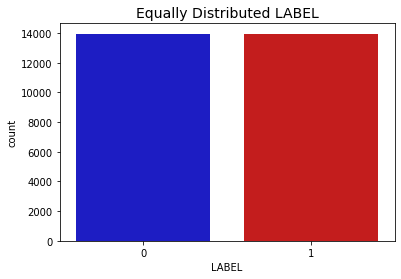

In [ ]:
#클래스 비율이 동등해졌는지 확인 
print('서브 샘플 안에서 LABEL 비율 확인') 
print(new_df['LABEL'].value_counts()/len(new_df)) 
colors = ['#0101DF', '#DF0101'] 
sns.countplot('LABEL', data = new_df, palette = colors) 
plt.title('Equally Distributed LABEL', fontsize = 14) 
plt.show()

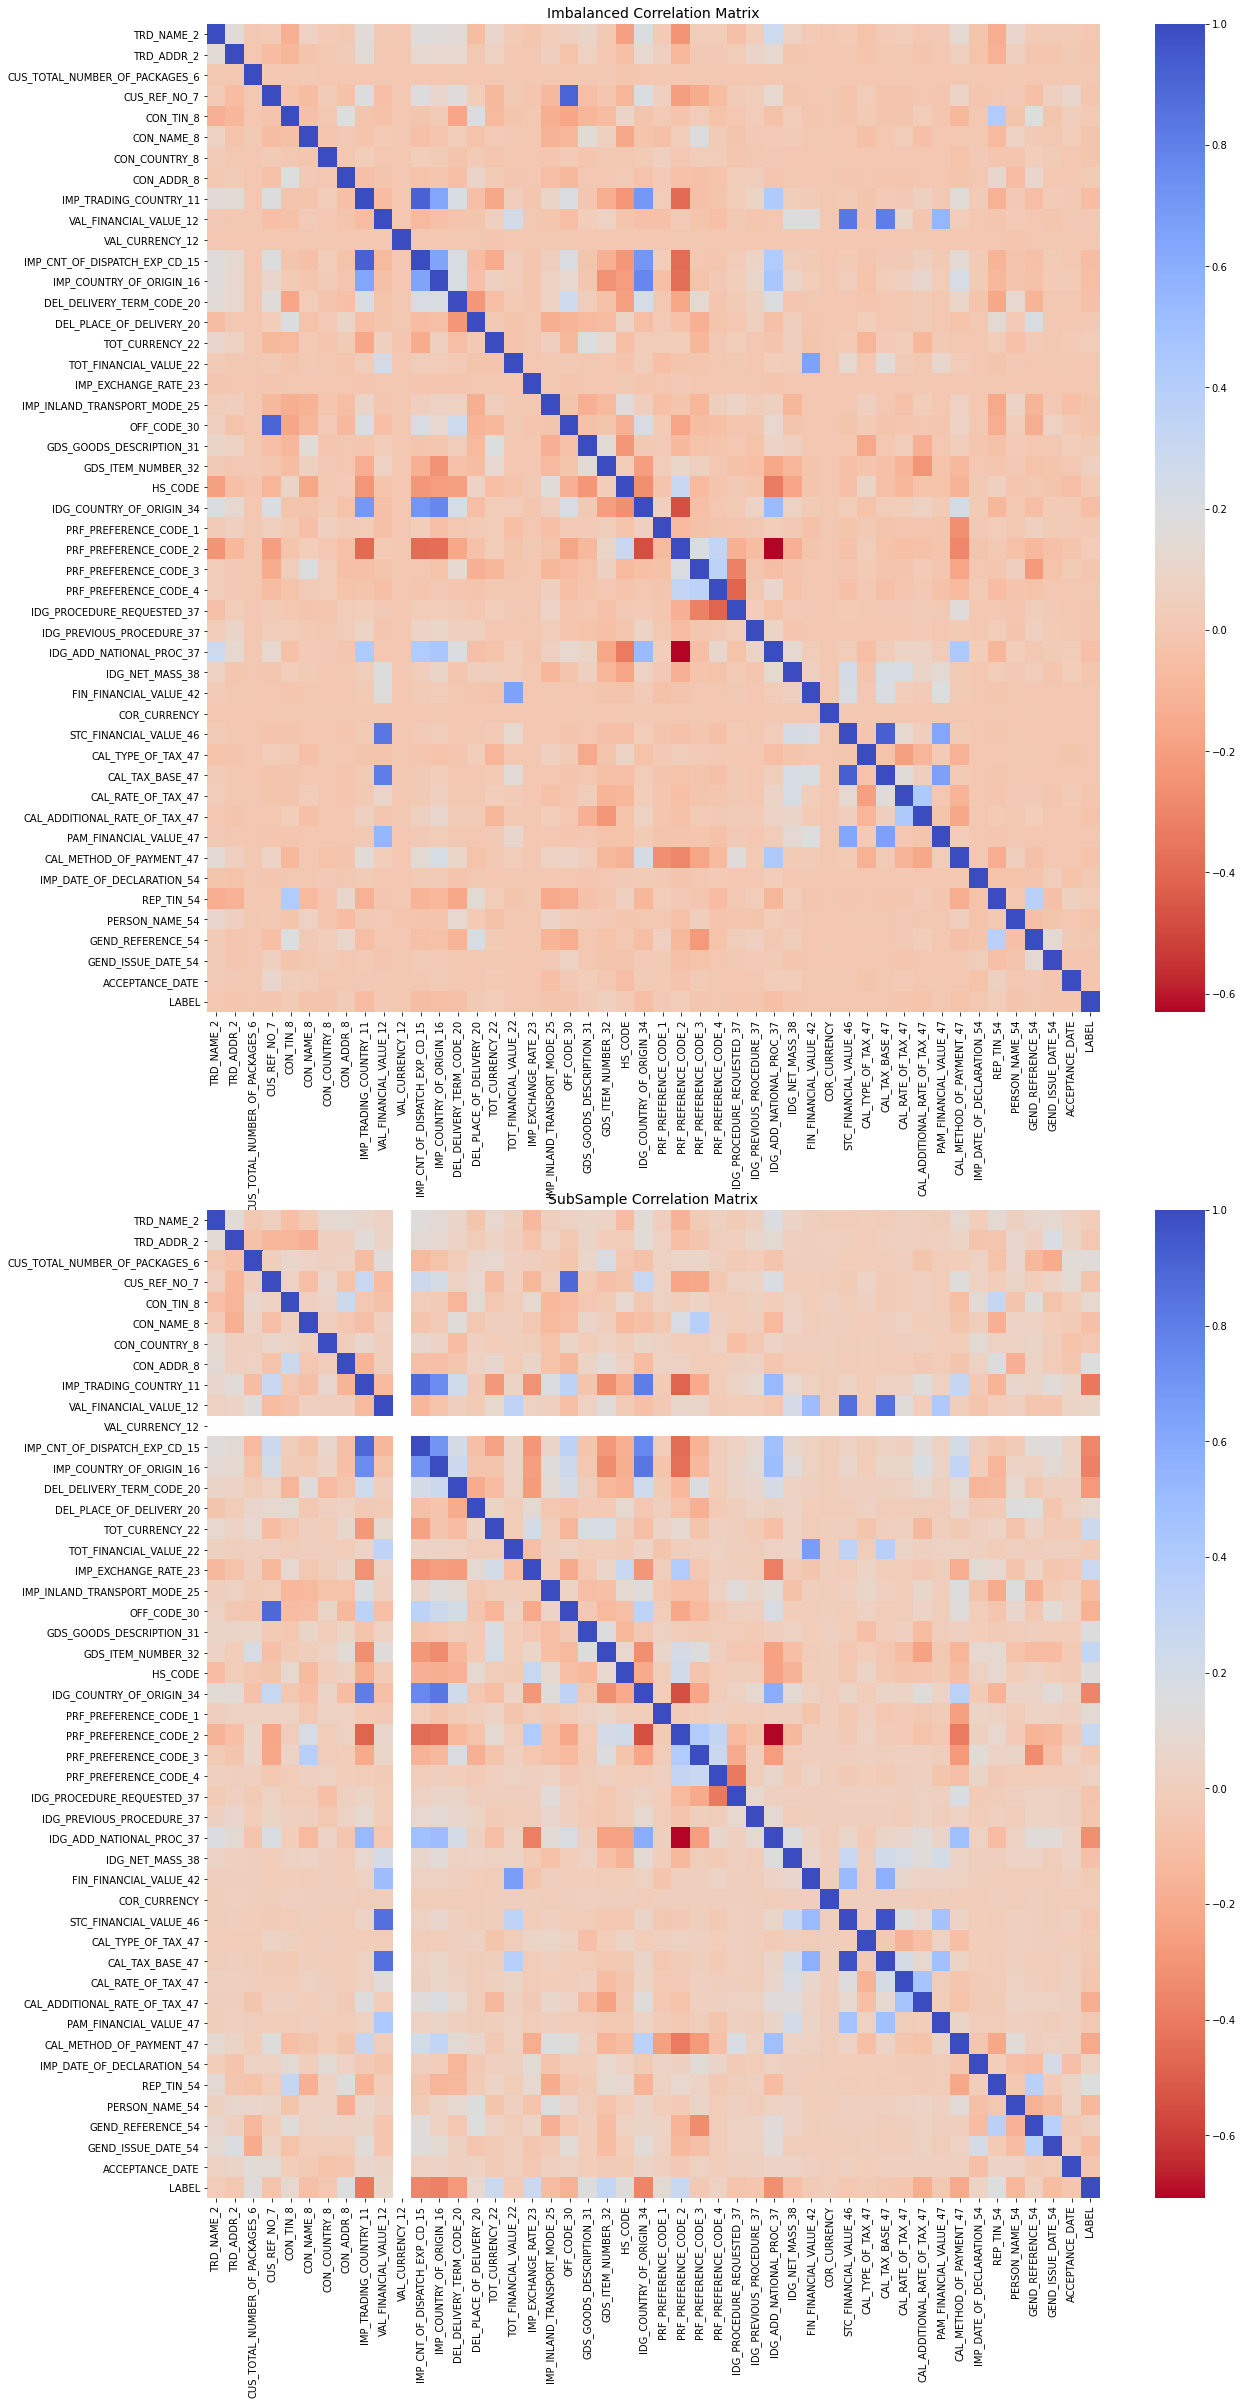

In [ ]:
#상관관계 행렬 시각화(heatmap) 
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 40)) 

corr = df.corr() 
sns.heatmap(corr, cmap = 'coolwarm_r', annot_kws = {'size' : 20}, ax = ax1) # 전체 히트맵
ax1.set_title("Imbalanced Correlation Matrix", fontsize = 14) # 기존 것은 LABEL과의 상관관계가 0에 가깝다

sub_sample_corr = new_df.corr() 
sns.heatmap(sub_sample_corr, cmap = 'coolwarm_r', annot_kws = {'size' : 20}, ax = ax2) # 언더샘플링 후 서브 히트맵
ax2.set_title('SubSample Correlation Matrix', fontsize = 14) # 색깔이 좀 나옴

plt.show()

In [ ]:
#줄이 삭제된 VAL_CURRENCY_12 ,COR_CURRENCY 는 통화 단위인데(TJS, USD와 같이)
#라벨 인코딩이 되어 있음에도 나오지 않는다.

In [ ]:
print(sub_sample_corr.iloc[-1,:]) #[셔플 1]
print('-' * 100) 
print(sub_sample_corr.loc[np.abs(sub_sample_corr['LABEL'])>=0.3].index) # LABEL과 상관관계가 0.3이상인 칼럼 추출
# 교차검증 코드 짜듯이 반복 코드를 짜면 좋을 것 같다.

TRD_NAME_2                       -0.002084
TRD_ADDR_2                       -0.054780
CUS_TOTAL_NUMBER_OF_PACKAGES_6    0.129429
CUS_REF_NO_7                     -0.072651
CON_TIN_8                         0.086348
CON_NAME_8                       -0.096843
CON_COUNTRY_8                    -0.053825
CON_ADDR_8                        0.141881
IMP_TRADING_COUNTRY_11           -0.420205
VAL_FINANCIAL_VALUE_12            0.033327
VAL_CURRENCY_12                        NaN
IMP_CNT_OF_DISPATCH_EXP_CD_15    -0.367460
IMP_COUNTRY_OF_ORIGIN_16         -0.382643
DEL_DELIVERY_TERM_CODE_20        -0.280441
DEL_PLACE_OF_DELIVERY_20          0.080241
TOT_CURRENCY_22                   0.254904
TOT_FINANCIAL_VALUE_22           -0.034272
IMP_EXCHANGE_RATE_23              0.255565
IMP_INLAND_TRANSPORT_MODE_25     -0.125201
OFF_CODE_30                      -0.174850
GDS_GOODS_DESCRIPTION_31          0.142022
GDS_ITEM_NUMBER_32                0.288402
HS_CODE                           0.122306
IDG_COUNTRY

In [ ]:
print(sub_sample_corr.iloc[-1,:]) #[셔플 2]
print('-' * 100) 
print(sub_sample_corr.loc[np.abs(sub_sample_corr['LABEL'])>=0.3].index) # LABEL과 상관관계가 0.3이상인 칼럼 추출

TRD_NAME_2                        0.003168
TRD_ADDR_2                       -0.048601
CUS_TOTAL_NUMBER_OF_PACKAGES_6    0.132351
CUS_REF_NO_7                     -0.067153
CON_TIN_8                         0.086905
CON_NAME_8                       -0.101825
CON_COUNTRY_8                    -0.054469
CON_ADDR_8                        0.138909
IMP_TRADING_COUNTRY_11           -0.415205
VAL_FINANCIAL_VALUE_12            0.105443
VAL_CURRENCY_12                  -0.005984
IMP_CNT_OF_DISPATCH_EXP_CD_15    -0.359374
IMP_COUNTRY_OF_ORIGIN_16         -0.377923
DEL_DELIVERY_TERM_CODE_20        -0.270374
DEL_PLACE_OF_DELIVERY_20          0.079314
TOT_CURRENCY_22                   0.255277
TOT_FINANCIAL_VALUE_22           -0.094231
IMP_EXCHANGE_RATE_23              0.095875
IMP_INLAND_TRANSPORT_MODE_25     -0.122691
OFF_CODE_30                      -0.169683
GDS_GOODS_DESCRIPTION_31          0.145260
GDS_ITEM_NUMBER_32                0.297570
HS_CODE                           0.122055
IDG_COUNTRY

In [ ]:
print(sub_sample_corr.iloc[-1,:]) #[셔플 3]
print('-' * 100) 
print(sub_sample_corr.loc[np.abs(sub_sample_corr['LABEL'])>=0.3].index) # LABEL과 상관관계가 0.3이상인 칼럼 추출

TRD_NAME_2                       -0.008706
TRD_ADDR_2                       -0.050853
CUS_TOTAL_NUMBER_OF_PACKAGES_6    0.124713
CUS_REF_NO_7                     -0.072524
CON_TIN_8                         0.079968
CON_NAME_8                       -0.091431
CON_COUNTRY_8                    -0.052733
CON_ADDR_8                        0.146988
IMP_TRADING_COUNTRY_11           -0.412829
VAL_FINANCIAL_VALUE_12            0.058830
VAL_CURRENCY_12                        NaN
IMP_CNT_OF_DISPATCH_EXP_CD_15    -0.360259
IMP_COUNTRY_OF_ORIGIN_16         -0.375506
DEL_DELIVERY_TERM_CODE_20        -0.274733
DEL_PLACE_OF_DELIVERY_20          0.076298
TOT_CURRENCY_22                   0.248714
TOT_FINANCIAL_VALUE_22           -0.031237
IMP_EXCHANGE_RATE_23              0.253564
IMP_INLAND_TRANSPORT_MODE_25     -0.113336
OFF_CODE_30                      -0.172376
GDS_GOODS_DESCRIPTION_31          0.141264
GDS_ITEM_NUMBER_32                0.289991
HS_CODE                           0.128066
IDG_COUNTRY

In [ ]:
# 차원축소와 클러스터링 
# 차원 축소는 스케일링을 꼭 진행해야 하는데(이상치 제거도..) 예제 케글(신용사기 검출)의 내용이 좋고, 
# Kmeans 외의 군집화 방법을 알 수 있어서 시각화를 진행해봄

# 알고리즘 적용에 걸리는 시간 측정 ==> t0 = time.time() 

#t-SNE 알고리즘으로 군집화 

X = new_df.drop('LABEL', axis = 1) 
y = new_df['LABEL'] 

t0 = time.time()  # 차원 축소 -> 주로 시각화에 많이 사용(비슷한 건 가까이, 아닌 건 멀리 떨어지도록 차원 축소)
X_reduced_tsne = TSNE(n_components = 2, random_state = 42).fit_transform(X.values) 
t1 = time.time() 
print("T-SNE too {:.2} s".format(t1 - t0)) 

#PCA 적용(차원축소) 
t0 = time.time() 
X_reduced_pca = PCA(n_components = 2, random_state = 42).fit_transform(X.values) 
t1 = time.time() 
print("PCA took {:.2} s".format(t1 - t0)) 

#Truncated SVD(차원축소)
t0 = time.time() 
X_reduced_svd = TruncatedSVD(n_components = 2, algorithm = 'randomized', random_state = 42).fit_transform(X.values) 
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE too 3e+02 s
PCA took 0.32 s
Truncated SVD took -0.0003 s


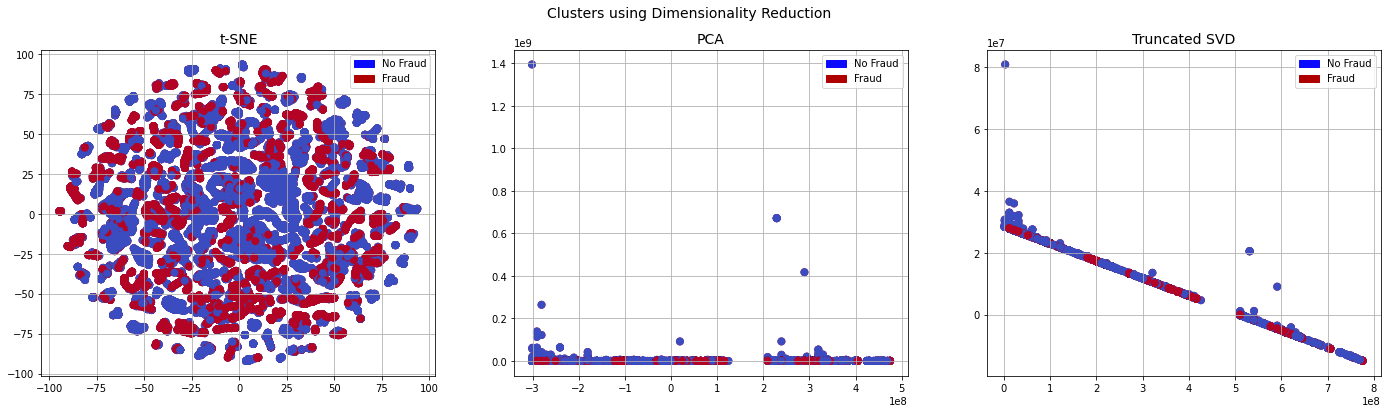

In [ ]:
# 군집화 한다면서 Kmeans를 생각하는데
# 차원 축소를 통해서도 그 데이터가 어떻게 조직되어 있고 어떤 패턴이 있는지 탐색할 수 있다고 한다. 
# 차원 축소: 정보의 손실을 최소화 시키면서, 데이터를 간소화 하며, 관련이 깊은 특성을 하나로 합치는 작업이다.
# 차원 축소의 시각화를 통해서 군집화와 비슷한 시각적인 정보를 얻을 수 있는 것으로 보인다. 취지는 좋으나 해석은 안됨..;ㅁ;

#클러스터링 시각화 (산점도) 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 6)) 
f.suptitle('Clusters using Dimensionality Reduction', fontsize = 14) 

blue_patch = mpatches.Patch(color = '#0A0AFF', label = 'No illegality') 
red_patch = mpatches.Patch(color = '#AF0000', label = 'illegality') 

#t-SNE 산점도 
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c = (y == 0), cmap = 'coolwarm', label = 'No illegality', linewidths = 2) 
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c = (y == 1), cmap = 'coolwarm', label = 'illegality', linewidths = 2) 
ax1.set_title('t-SNE', fontsize = 14) 
ax1.grid(True) # 그래프 실선 삽입
ax1.legend(handles = [blue_patch, red_patch]) 

#PCA산점도 
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c = (y == 0), cmap = 'coolwarm', label = 'No illegality', linewidths = 2) 
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c = (y == 1), cmap = 'coolwarm', label = 'illegality', linewidths = 2) 
ax2.set_title('PCA', fontsize = 14) 
ax2.grid(True) 
ax2.legend(handles = [blue_patch, red_patch]) 

#truncated SVD 산점도 
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c = (y == 0), cmap = 'coolwarm', label = 'No illegality', linewidths = 2)
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c = (y == 1), cmap = 'coolwarm', label = 'illegality', linewidths = 2) 
ax3.set_title('Truncated SVD', fontsize = 14) 
ax3.grid(True) 
ax3.legend(handles = [blue_patch, red_patch]) 
plt.show()